## Commutation relations

$$\begin{align}
a(\nu) &= -\frac{\sqrt{2\kappa}}{m^\prime(\nu)}\left[d_+(\nu)a_{in}(\nu)+\epsilon a^\dagger_{in}(-\nu)\right]\\
a^\dagger(-\nu) &= -\frac{\sqrt{2\kappa}}{m^\prime(\nu)}\left[d_-(\nu)a^\dagger_{in}(-\nu)+\epsilon^* a_{in}(\nu)\right]\\
\left[a_{in}(\nu),a^\dagger_{in}(-\nu^\prime)\right]&=\left(1+\frac{k}{\kappa}\cos{(\phi+\nu\tau)}\right)\delta\left(\nu+\nu^\prime\right)\\
\left[a(\nu),a^\dagger(-\nu^\prime)\right]&=2\frac{\kappa+k\cos{(\phi+\nu\tau)}}{d_+(\nu)d_-(\nu)-|\epsilon|^2}\delta\left(\nu+\nu^\prime\right)\\
\end{align}$$

125.663706144
(1726.18077019-125.663706144j)
125.663706144
(1726.18077019+125.663706144j)
125.663706144
(-52592.1920863-29287.8328706j)
125.663706144
(1727.18075178-0.53917840598j)
125.663706144
(-52592.1920863+29287.8328706j)
125.663706144
(1727.18075178+0.53917840598j)
125.663706144
(260.379640058-4812.77415044j)
125.663706144
(1727.18008843-3.28113610739j)
125.663706144
(260.379640058+4812.77415044j)
125.663706144
(1727.18008843+3.28113610739j)
125.663706144
(1536.74210474-1734.1530685j)
125.663706144
(1727.17551916-9.10609756921j)
125.663706144
(1536.74210474+1734.1530685j)
125.663706144
(1727.17551916+9.10609756921j)
125.663706144
(1681.78177821-846.706646814j)
125.663706144
(1727.15874327-18.6503402343j)
125.663706144
(1681.78177821+846.706646814j)
125.663706144
(1727.15874327+18.6503402343j)
125.663706144
(1712.49703646-481.535283168j)
125.663706144
(1727.11266762-32.7937901826j)
125.663706144
(1712.49703646+481.535283168j)
125.663706144
(1727.11266762+32.7937901826j)
125.663706

C:\Users\niki\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:383: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)


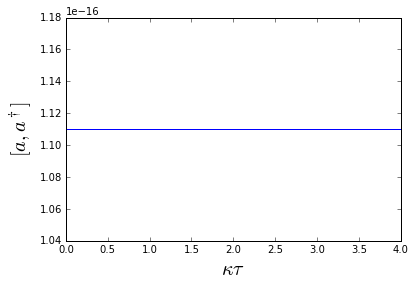

In [4]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
from scipy import integrate
matplotlib.rcParams['backend'] = 'TkAgg' 
kappa = 10.*2.*pi
k     = 0.
phi   = 0.
Delta = 0.
eps   = .75*kappa

def f(nu,ktau):
    tau   = ktau/kappa
    nom   = 2*(kappa+k*cos(phi+nu*tau))
    denom = (kappa-1j*(nu+Delta)+k*exp(1j*(nu*tau-phi)))*(kappa-1j*(nu-Delta)+k*exp(1j*(nu*tau+phi)))-eps**2
    print(nom)
    print(denom)
    return (nom/denom)

def fint(ktau):
    return integrate.quad(f, -np.inf, np.inf, args=(ktau))[0]

vec_fint = np.vectorize(fint)
ktauvec = linspace(0,4.,100)

#figure(1)
plt.plot(ktauvec, vec_fint(ktauvec));
plt.xlabel('$\kappa\\tau$', fontsize=20)
plt.ylabel('$[a,a^\dagger]$',fontsize=20)
show()

[ 125.66370614  125.66370614  125.66370614 ...,  125.66370614  125.66370614
  125.66370614]
[-22946.83023253+19739.20880218j -22936.96062823+19735.26056559j
 -22927.09299824+19731.31232901j ..., -22927.09299824-19731.31232901j
 -22936.96062823-19735.26056559j -22946.83023253-19739.20880218j]
[ 125.66370614  125.66370614  125.66370614 ...,  125.66370614  125.66370614
  125.66370614]
[-22946.83023253+19739.20880218j -22936.96062823+19735.26056559j
 -22927.09299824+19731.31232901j ..., -22927.09299824-19731.31232901j
 -22936.96062823-19735.26056559j -22946.83023253-19739.20880218j]
[ 125.66370614  125.66370614  125.66370614 ...,  125.66370614  125.66370614
  125.66370614]
[ 1727.18077019+0.j  1727.18077019+0.j  1727.18077019+0.j ...,
  1727.18077019+0.j  1727.18077019+0.j  1727.18077019+0.j]
[ 125.66370614  125.66370614  125.66370614 ...,  125.66370614  125.66370614
  125.66370614]
[ 1727.18077019+0.j  1727.18077019+0.j  1727.18077019+0.j ...,
  1727.18077019+0.j  1727.18077019+0.j  1727.

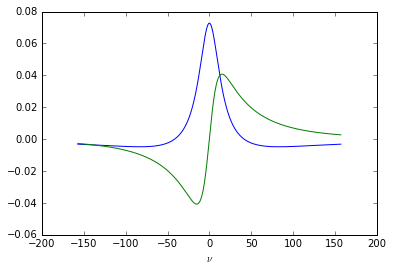

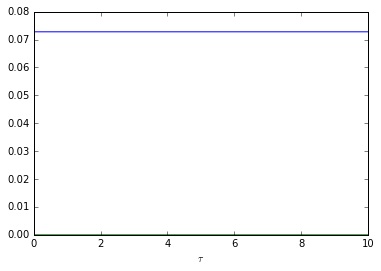

In [5]:
f1=lambda nu : f(nu,0);
figure(1)
nu = linspace(-25*2*pi,25*2*pi,10000)
plot(nu,f1(nu).real,nu,f1(nu).imag)
xlabel("$\\nu$")
f2=lambda ktau : f(0,ktau) 
figure(2)
ktau = linspace(0,10,10000)
plot(ktau,f2(ktau).real,ktau,f2(ktau).imag)
xlabel("$\\tau$")
show()

In [1]:
from functools import partial
from scipy.fftpack import fft

N = 256
nu = linspace(-400*pi*2,400*pi*2,N)
f0 = f1(0)
fourier = f(nu,2)
figure(1)
plot(nu/2./pi,fourier.real,label="real",linewidth = 2.0)
hold(True)
plot(nu/2./pi,fourier.imag,label="imag",linewidth = 2.0)
legend(loc='best')
xlabel('$\\nu$', fontsize = 20)
ylabel('$[a(\\nu),a^\dagger(\\nu^\prime)]$', fontsize = 20)
grid(True)
xlim(-25,25)
hold(False)

figure(2)
time = ifft(fourier)
time0 = ifft(f(nu,0))
space = (nu[N-1]-nu[0])/N
t = linspace(0,1/2/space,N)
#print(space)
#print(time[0])
#print(time[1])
#print(t[0])
#print(t[1])
plot(t,time.real,label="real",linewidth = 2.0)
hold(True)
plot(t, time.imag,label="imag",linewidth = 2.0)
plot(t, time0.real,label="$\kappa\\tau=0$",linewidth = 2.0)
legend(loc='best')
xlabel('$t-t^\prime$', fontsize = 20)
ylabel('$[a(t),a^\dagger(t^\prime)]$', fontsize = 20)
xlim(0,.01)
grid(True)
hold(False)

figure(3)
Ni = 4000
ktau = zeros(Ni)
ddep = zeros(Ni,dtype=complex)
for i in range(Ni):
    ktau[i] = 0.0025*i
    four    = f(nu,ktau[i])
    timd    = ifft(four/f0)
    ddep[i] = timd[0]
plot(ktau,ddep.real,label='real',linewidth = 2.0)
hold(True)
plot(ktau,ddep.imag,label='imag',linewidth = 2.0)
legend(loc='best')
xlabel('$\kappa\\tau$', fontsize = 20)
ylabel('$[a(t),a^\dagger(t)]$', fontsize = 20)
grid(True)
ylim(-.4,1)
hold(False)
show()

NameError: name 'linspace' is not defined